# **Titanic Survival Prediction**

## **Developed by : - Noureddine FALEH**

#Classic Machine Learning Problem: Titanic Survival

This notebook aims to guide you through a step-by-step process, where we'll provide necessary stages for analysis and modeling our problem.
Please fill in the code cells and follow the instructions.

You are free to customize and add whatever you see as necessary for a better overall analysis and modeling.

##Import packages

Import the necessary packages for data visualization and data manipulation  

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle

from scikitlearn import the following classifiers : Logistic Regression

import the necessary pre-processing tools

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import the classification report to evaluate our models

In [3]:
from sklearn.metrics import classification_report

## Acquiring Data

Create a DataFrame to read the titanic csv file provided in the following link : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

Examine the dataset's initial 10 lines.

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Examine the dataset's last 10 lines.

In [6]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


View some key descriptive statistics about the dataset

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe the variables in our dataset:


1.   How many variables do we have in our dataset?
2.   Which are the categorical variables that can be useful in our project?
3.   Which are the numerical variables that can be useful in our project?



Please submit your answers here:



1.  There are a total of 12 columns (variables) in our dataset.
2.  The categorical variables in our dataset that can be useful in our project include:
Name (Object)
Sex (Object)
Ticket (Object)
Cabin (Object)
Embarked (Object)
3. The numerical variables in our dataset that can be useful in our project include:
PassengerId (Int64)
Survived (Int64)
Pclass (Int64)
Age (Float64)
SibSp (Int64)
Parch (Int64)
Fare (Float64)



In [8]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


##EDA (Exploratory Data Analysis) and Data Wrangling

Make a pie chart to view how many passengers have survived using `matplotlib`

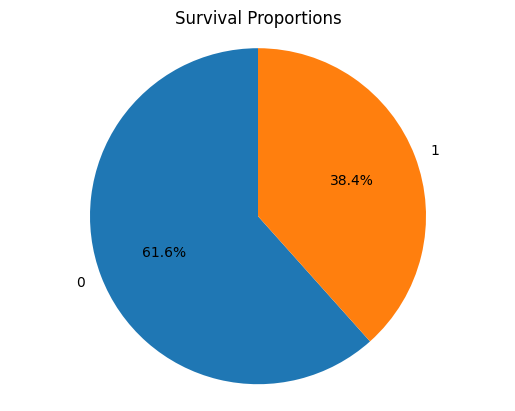

In [9]:
# Calculate the proportions
survived_proportions = df["Survived"].value_counts(normalize=True)

# Create a pie chart
plt.pie(survived_proportions, labels=survived_proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Survival Proportions')

# Show the pie chart
plt.show()

Create a correlation matrix to check for useful variables using `pandas` method `corr()`

In [10]:
# Sélectionnez les colonnes numériques que vous souhaitez inclure dans la matrice de corrélation
numerical_columns = ["Survived", "Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]

# Créez une sous-dataframe avec ces colonnes
correlation_df = df[numerical_columns]

# Utilisez la méthode corr() pour calculer la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Affichez la matrice de corrélation
print(correlation_matrix)

          Survived    Pclass       Age       Sex     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221  0.543351 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226 -0.131900  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.093254 -0.308247 -0.189119  0.096067
Sex       0.543351 -0.131900 -0.093254  1.000000  0.114631  0.245489  0.182333
SibSp    -0.035322  0.083081 -0.308247  0.114631  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.245489  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.182333  0.159651  0.216225  1.000000


Which variables are highly correlated with the target?

Please submit your answers here:


"Sex", "Fare" and "Pclass" are the variables that are relatively more highly correlated with the "Survived" variable.



Elaborate more with plots and charts for these variables.

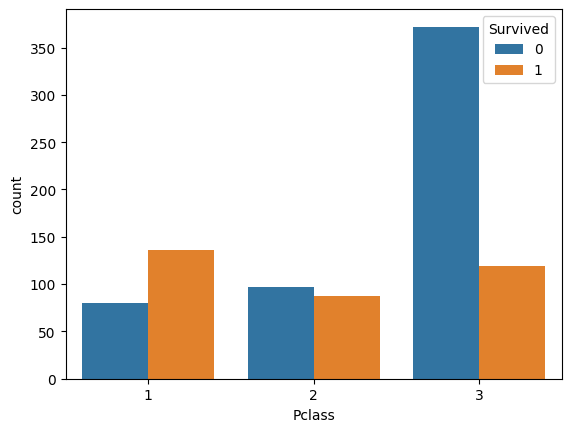

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [11]:
# Visualize with a countplot
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

# Proportion of people survived for each class
print(df["Survived"].groupby(df["Pclass"]).mean())

# How many people we have in each class?
print(df["Pclass"].value_counts())

<ipython-input-12-8ce0cb811815>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.Survived==1]["Age"],color="y", bins=7, label="1")
<ipython-input-12-8ce0cb811815>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.Survived==0]["Age"], bins=7, label="0")


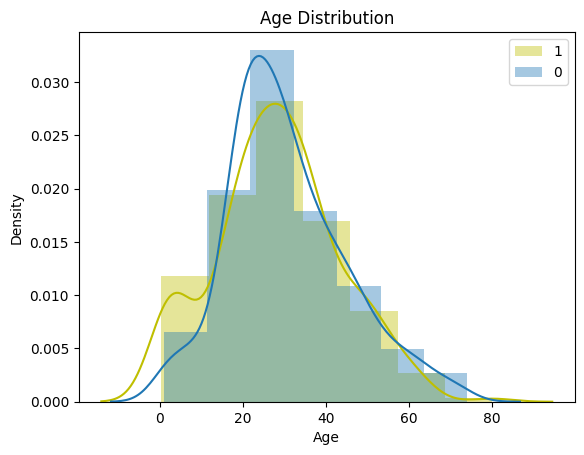

In [12]:
# Survived by age
sns.distplot(df[df.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(df[df.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

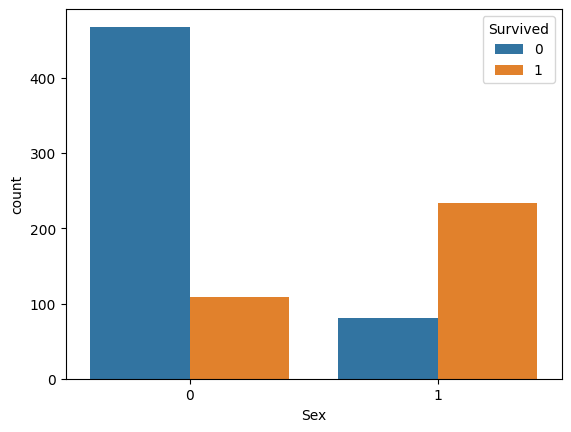

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Sex
0    577
1    314
Name: count, dtype: int64


In [13]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

# Proportion of people survived for each class
print(df["Survived"].groupby(df["Sex"]).mean())

# How many people we have in each class?
print(df["Sex"].value_counts())

Fare
(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: count, dtype: int64


<ipython-input-14-b729f3e01543>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


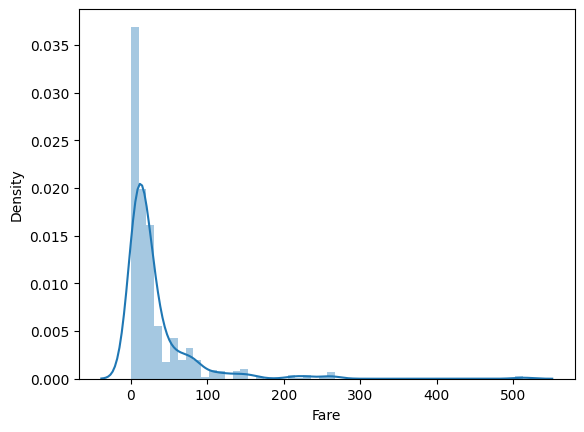

Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]    1.000000
Name: Survived, dtype: float64


In [14]:
# Print 3 bins of Fare column
print(pd.cut(df['Fare'], 3).value_counts())

# Plot the histogram
sns.distplot(df["Fare"])
plt.show()

# Print binned Fares by surviving rate
print(df['Survived'].groupby(pd.cut(df['Fare'], 3)).mean())

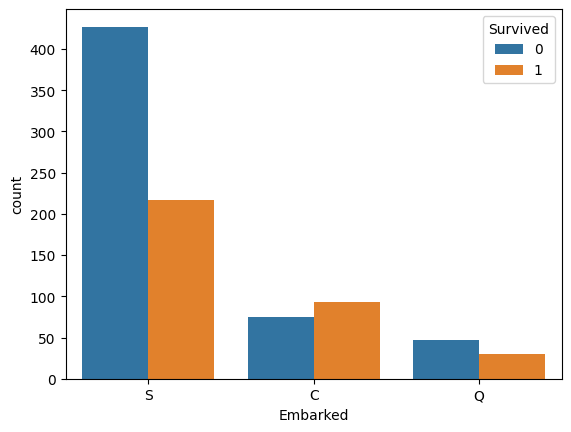

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [15]:
# Make a countplot
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.show()

# Print the value counts
print(df["Embarked"].value_counts())

# Surviving rates of Embarked
print(df["Survived"].groupby(df["Embarked"]).mean())

Examine the dataset for any missing values and print out the columns that contain them using `pandas` method `isnull()`

In [16]:
# Check for missing values in each column and print columns with missing values
missing_columns = df.columns[df.isnull().any()]
missing_data = df[missing_columns]

# Print the columns with missing values
print("Columns with missing values:")
for column in missing_columns:
    print(column)

Columns with missing values:
Age
Cabin
Embarked


Examine the dataset for any duplicated values and print out the columns that contain them using `pandas` method `duplicated()`

In [17]:
# Check for duplicated rows and print columns with duplicated values
#duplicated_rows = df[df.duplicated()]
#duplicated_columns = df.columns[df.duplicated().any()]

# Print the columns with duplicated values
#print("Columns with duplicated values:")
#for column in duplicated_columns:
#    print(column)

Locate the column with the highest count of missing values and display the count.

In [18]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Find the column with the highest count of missing values
column_with_most_missing = missing_counts.idxmax()
count_of_most_missing = missing_counts.max()

# Display the column name and the count of missing values
print(f"The column with the highest count of missing values is '{column_with_most_missing}' with {count_of_most_missing} missing values.")

The column with the highest count of missing values is 'Cabin' with 687 missing values.


Remove that column from the DataFrame.






In [19]:
# Remove the 'Cabin' column
df = df.drop(columns=['Cabin'])

# Verify that the 'Cabin' column has been removed
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


If a variable has a limited set of possible values, you can replace missing values with the mode corresponding to that variable.

In [20]:
# Replace missing values in 'Age' with the mode
age_mode = df['Age'].mode().iloc[0]
df['Age'].fillna(age_mode, inplace=True)

# Replace missing values in 'Embarked' with the mode
embarked_mode = df['Embarked'].mode().iloc[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

# Verify that missing values have been replaced
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Address the remaining missing values using a method that you find suitable (you can consider label encoding)

In [21]:
# Replace missing values in 'Age' with the median age
#median_age = df['Age'].median()
#df['Age'].fillna(median_age, inplace=True)

# Verify that missing values have been replaced
#print(df.isnull().sum())

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [22]:
#Assuming your DataFrame is named 'df'
df.to_csv('titanic_enc.csv', index=False)

## Modeling

Based on your analysis, select the appropriate features in your data and save them in a `features` DataFrame.

select the target variable and save it in a `target` Series (unidimensional DataFrame).

In [23]:
# Select the features (X) and target variable (y)
features = df[['Sex','Fare', 'Pclass']]
target = df['Survived']

# Verify the shape of the features DataFrame and target Series
print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (891, 3)
Target shape: (891,)


Import `train_test_split()` to split your data into training data and testing data from `sklearn`



In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 3)
X_test shape: (179, 3)
y_train shape: (712,)
y_test shape: (179,)


Create a `LogisticRegression` classifier instance and fit it to the training data.

In [25]:
# Create a Logistic Regression classifier instance
logistic_regression = LogisticRegression(random_state=42, max_iter=100)  # Set the maximum number of iterations

# Fit the classifier to the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Evaluation

Make predictions with the model and print the `classification_report` to evaluate performance, we take interest in F1 score and Accuracy.

In [26]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)

# Print the classification report to evaluate performance
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



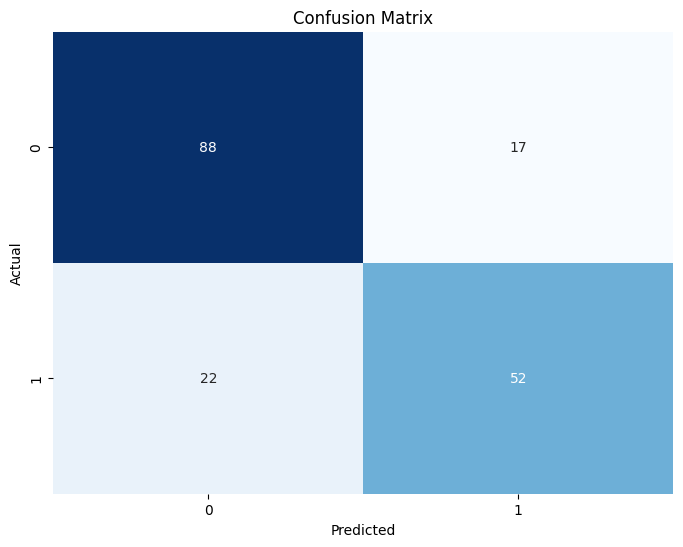

In [27]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn to plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

In [28]:
# Enregistrer le modèle entraîné
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression, file)

print("Modèle enregistré avec succès!")

Modèle enregistré avec succès!


# **Titanic Survival Prediction**

## **Developed by : - Noureddine FALEH**